In [261]:
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# EDA - Univariate & Multivariate Analysis:

In [357]:
# Import pandas 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data using read_csv() 
df = pd.read_csv("concrete.csv")
df.shape

(1030, 9)

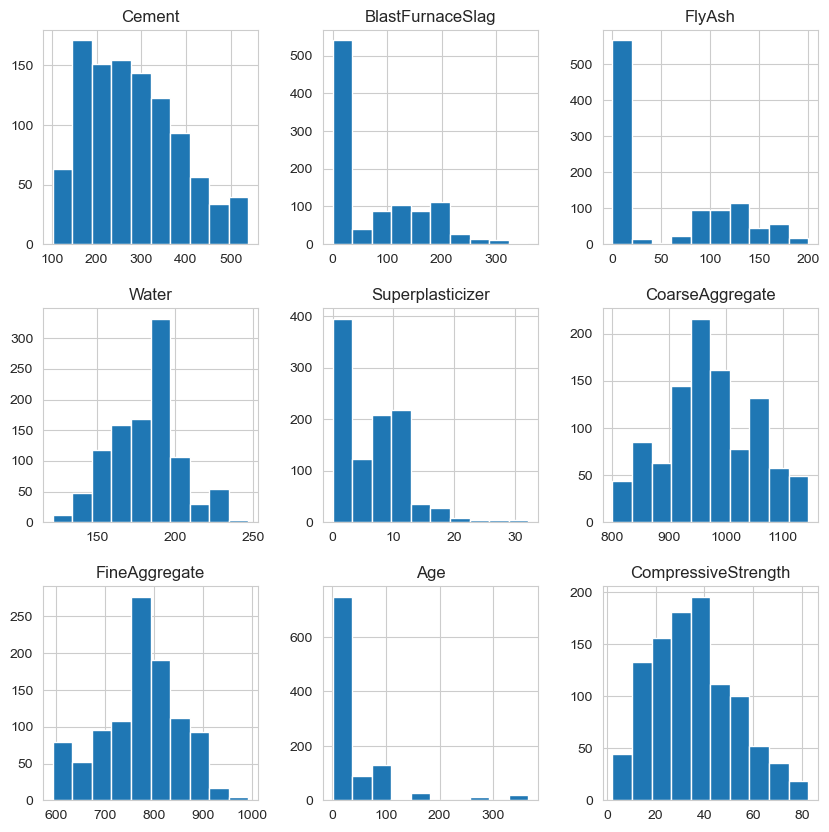

In [171]:
#Plot a histogram for each feature to check the distribution
df.hist(bins=10,figsize=(10,10))
plt.show()

# Conclusion :- 

We observe that only CoarseAggregate, and FineAggregate are normally distributed rest others are skewed and have outliers.

<Axes: xlabel='CompressiveStrength'>

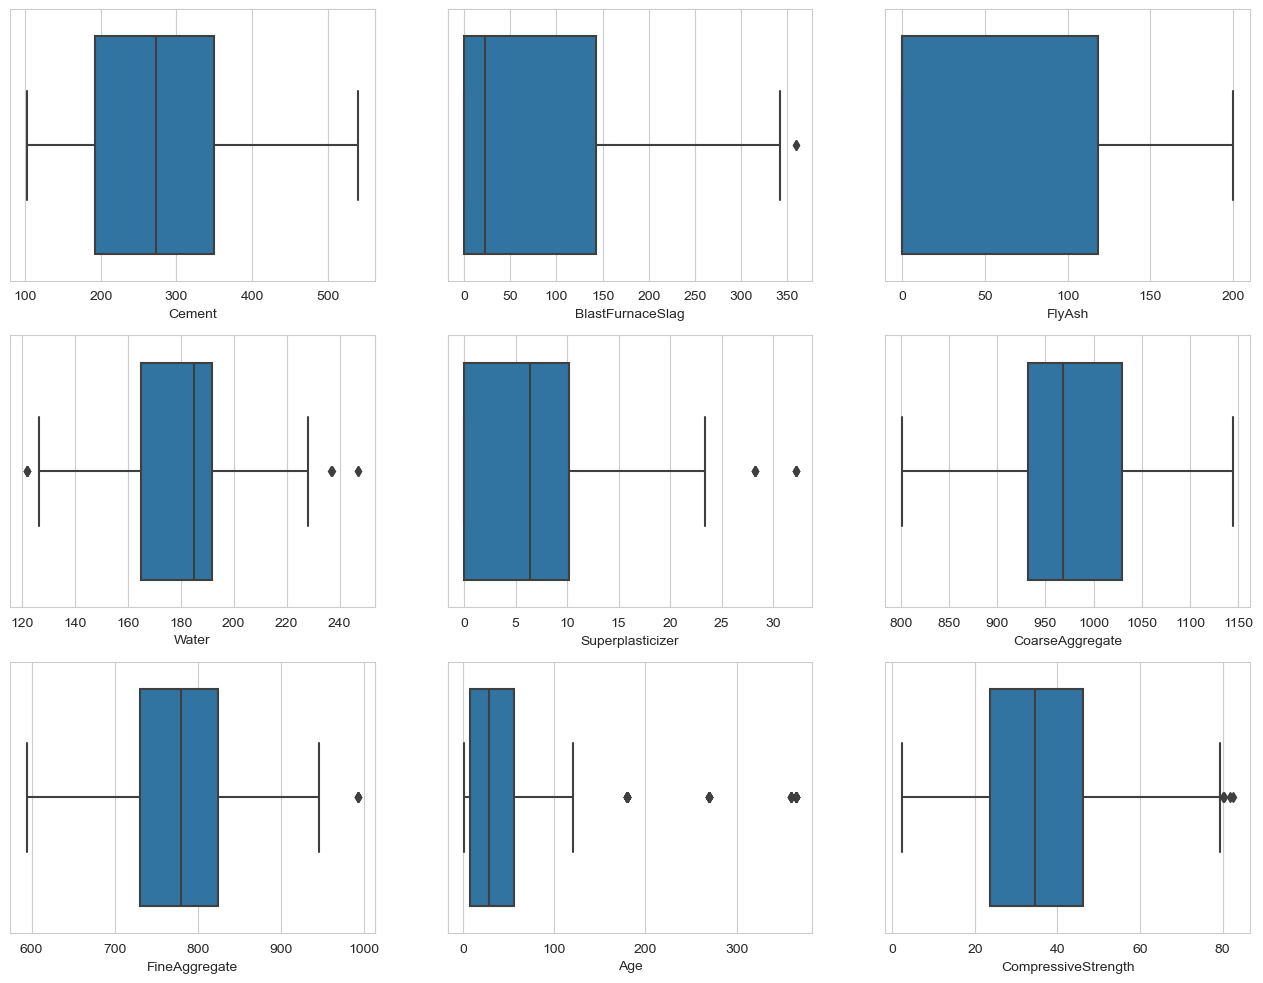

In [348]:
import seaborn as sns

plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Cement',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BlastFurnaceSlag',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='FlyAsh',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Water',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Superplasticizer',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='CoarseAggregate',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='FineAggregate',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,9)
sns.boxplot(x ='CompressiveStrength', data=df)

# Conclusion - 

We observe that the BlastFurnaceSlag, Water, Superplasticizer, FineAggregate, Age, and CompressiveStrength have outliers. 

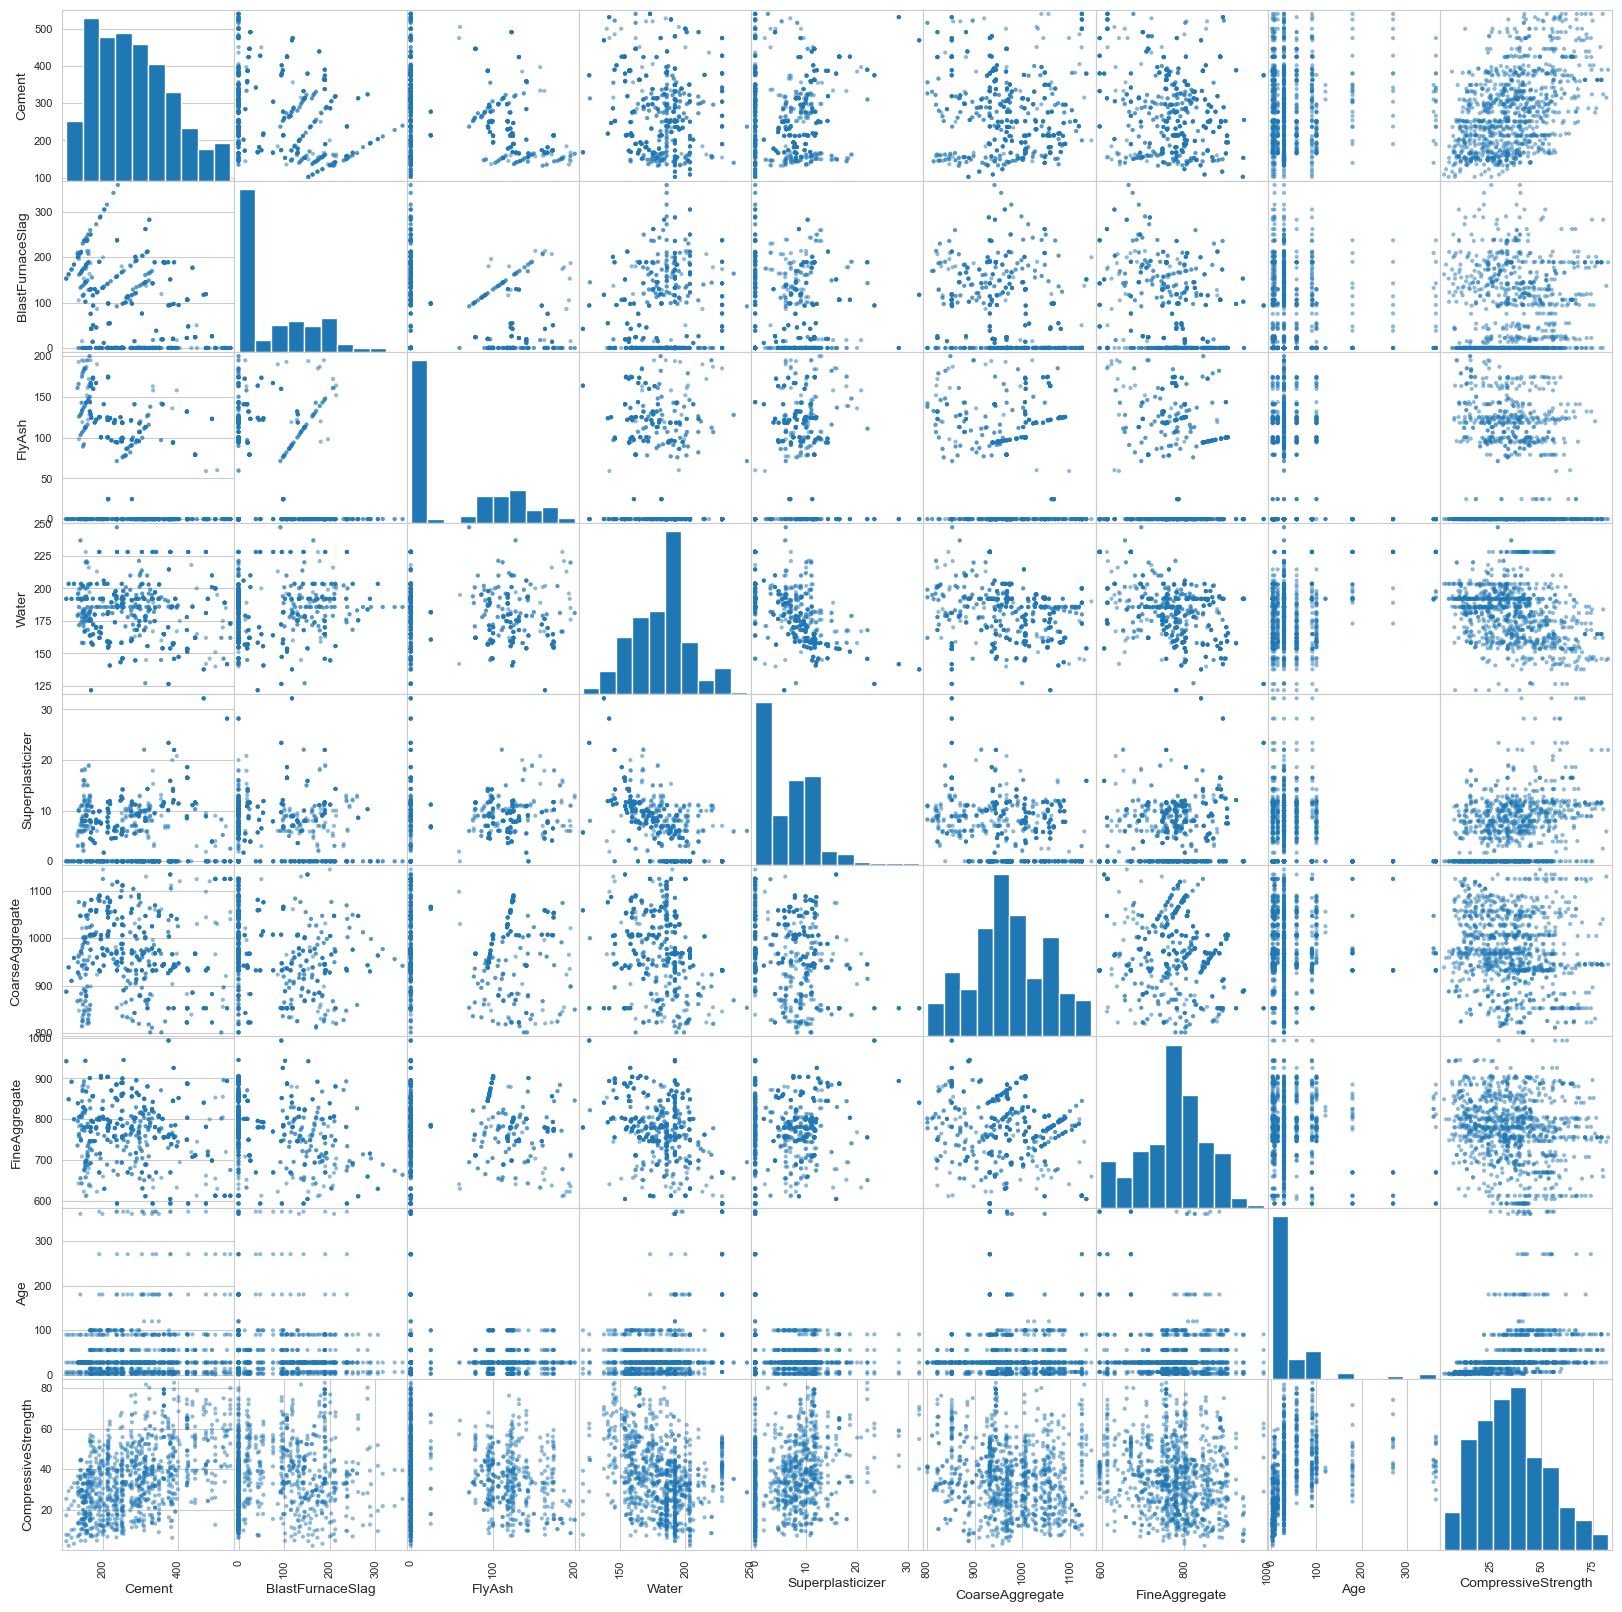

In [122]:
# use a scatter matrix to check relationship between variables
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));

<Axes: >

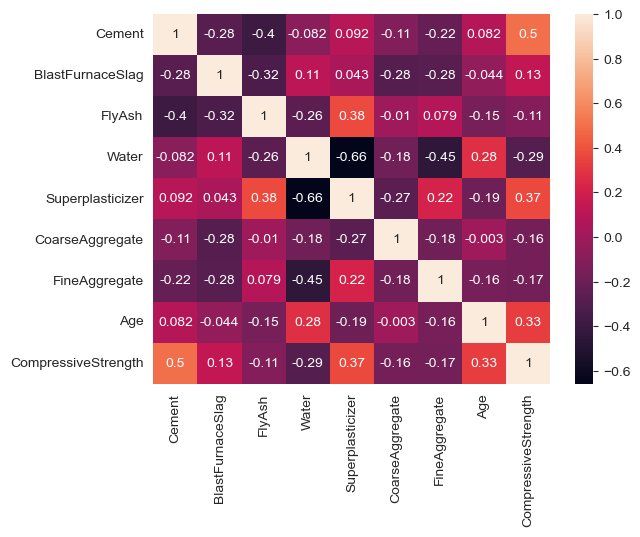

In [349]:
#Determine correlated features using a heatmap
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

# Conclusion: 

We observe that Cement, Superplasticizer, and Age have fair correlations with CompressiveStrength. Since the correlation is not that strong, we decided not to drop any attrbutes.

# Data preparation & Feature Engineering:

In [189]:
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [242]:
# Check for duplicate entries
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:", duplicate_rows)

Duplicate rows:      Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
77    425.0             106.3     0.0  153.5              16.5   
80    425.0             106.3     0.0  153.5              16.5   
86    362.6             189.0     0.0  164.9              11.6   
88    362.6             189.0     0.0  164.9              11.6   
91    362.6             189.0     0.0  164.9              11.6   
100   425.0             106.3     0.0  153.5              16.5   
103   425.0             106.3     0.0  153.5              16.5   
109   362.6             189.0     0.0  164.9              11.6   
111   362.6             189.0     0.0  164.9              11.6   
123   425.0             106.3     0.0  153.5              16.5   
126   425.0             106.3     0.0  153.5              16.5   
132   362.6             189.0     0.0  164.9              11.6   
134   362.6             189.0     0.0  164.9              11.6   
137   362.6             189.0     0.0  164.9              11

In [358]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()
df.shape

(1005, 9)

In [230]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64

Since the minimum values of BlastFurnaceSlag, FlyAsh, and Superplasticizer are zero, we will check the number of zeroes in these 3 variables. 

In [359]:
#checking for 0 values 

print(df[df['BlastFurnaceSlag']==0].shape[0])
print(df[df['FlyAsh']==0].shape[0])
print(df[df['Superplasticizer']==0].shape[0])

470
541
378


In [355]:
#replacing 0 values with mean and median of that column
df['BlastFurnaceSlag']=df['BlastFurnaceSlag'].replace(0,df['BlastFurnaceSlag'].median())
df['FlyAsh']=df['FlyAsh'].replace(0,df['FlyAsh'].mean())
df['Superplasticizer']=df['Superplasticizer'].replace(0,df['Superplasticizer'].median())

In [360]:
# removing outliers
from sklearn.preprocessing import QuantileTransformer

quantile  = QuantileTransformer()
df_new = quantile.fit_transform(df)
df_new1 =quantile.transform(df_new)
df_new1 = pd.DataFrame(df_new)
df_new1.columns =['Cement', 'BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age','CompressiveStrength']
df_new1.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,1.000000,0.000000,0.0,0.201702,0.384384,0.755756,0.135135,0.522022,0.997038
1,1.000000,0.000000,0.0,0.201702,0.384384,0.822322,0.135135,0.522022,0.934263
2,0.717718,0.752753,0.0,0.969970,0.000000,0.260761,0.000000,0.974474,0.648511
3,0.717718,0.752753,0.0,0.969970,0.000000,0.260761,0.000000,1.000000,0.667668
4,0.271271,0.723724,0.0,0.689690,0.000000,0.567568,0.764765,0.983984,0.736737


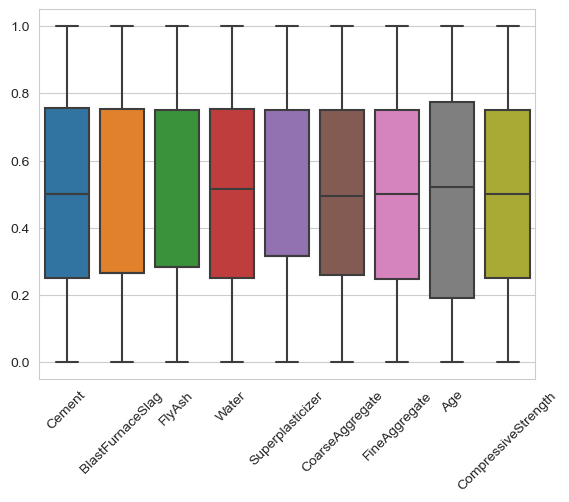

In [270]:
# Create boxplot
import seaborn as sns
sns.boxplot(df_new1)

# rotate x label for clear visualization
plt.xticks(rotation=45)
# Show figure
plt.show()

# Modeling & Evaluation:

In [277]:
target_name='CompressiveStrength'
y= df_new1[target_name]#given predictions - training data 
X=df_new1.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [279]:
X_train.shape,y_train.shape

((703, 8), (703,))

In [280]:
X_test.shape,y_test.shape

((302, 8), (302,))

In [281]:
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 703 samples in the training set and 302 samples in the test set


# K-Nearest Neighbor Regressor: 

In [337]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

neigh = KNeighborsRegressor(n_neighbors = 4, p = 2, metric='minkowski')


neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

RMSE: 0.11774078522356769
MAE: 0.09093848919260644
MSE: 0.013862892505062297
R2: 0.833990665692854


# Random Forest: 

In [338]:
from sklearn.ensemble import RandomForestRegressor

#Create Random Forest object
random_forest = RandomForestRegressor()

#Train model
random_forest.fit(X_train, y_train)


y_pred = random_forest.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

RMSE: 0.09330517612169685
MAE: 0.06866920376514134
MSE: 0.008705855891100867
R2: 0.8957466242685039


# XGBoost

In [304]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/45/6d/8c1d2570a52db6263d855c3ee3daf8f4bdf4a365cd6610772d6fce5fd904/xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 950.8 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [339]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

xgb1 = XGBRegressor(objective="reg:linear", 
                    n_estimators=100, 
                    learning_rate=0.1, 
                    max_depth=5, 
                    random_state=42)

# Train the model
xgb1.fit(X_train, y_train)


y_pred = xgb1.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

RMSE: 0.09278833015965703
MAE: 0.06693350038575725
MSE: 0.008609674213817517
R2: 0.8968984081557787


In [330]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import xgboost as xgb

neigh = KNeighborsRegressor()
random_forest = RandomForestRegressor()
xgb1 = XGBRegressor()
                                           
voting_regressor = VotingRegressor(estimators=[('knn', neigh), ('rf', random_forest ), ('xgb', xgb1)])
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('knn', KNeighborsRegressor()),
                            ('rf', RandomForestRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))])

In [327]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for model in [neigh, random_forest, xgb1, voting_regressor]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(model.__class__.__name__)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MSE:", mse)
    print("R2:", r2)

KNeighborsRegressor
RMSE: 0.11980483198783198
MAE: 0.0936971759989437
MSE: 0.014353197767632648
R2: 0.8281192178534603
RandomForestRegressor
RMSE: 0.0920569083434936
MAE: 0.0677502380033862
MSE: 0.008474474373762383
R2: 0.8985174379100518
XGBRegressor
RMSE: 0.09390676234908292
MAE: 0.06427027590761819
MSE: 0.008818480014887138
R2: 0.8943979406651464
VotingRegressor
RMSE: 0.09224800147432853
MAE: 0.06953062161802638
MSE: 0.008509693776007719
R2: 0.8980956825282432


# Conclusion: 

The RandomForestRegressor has the lowest RMSE, MAE, and MSE, and the highest R2 accuracy, indicating that it is the best model for this project. On the other hand, the KNeighborsRegressor has the highest RMSE, MAE, and MSE, and the lowest R2 accuracy, indicating that it is the worst-performing model for this project.